<a href="https://colab.research.google.com/github/raheem7348/Loan-Status-Prediction/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [ ]:
#droppping the mmissing values
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df.shape

(480, 13)

In [ ]:
#label encoding using pandas replace function
df.replace({'Loan_Status':{'Y':1, "N":0}}, inplace=True)

/tmp/ipython-input-1802643266.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Loan_Status':{'Y':1, "N":0}}, inplace=True)


In [ ]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
#dependent column
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [ ]:
#changoing 3+ valiue to 4
df = df.replace(to_replace='3+', value='4')

In [ ]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
382,LP002231,Female,No,0,Graduate,No,6000,0.0,156.0,360.0,1.0,Urban,1
475,LP002527,Male,Yes,2,Graduate,Yes,16525,1014.0,150.0,360.0,1.0,Rural,1
572,LP002855,Male,Yes,2,Graduate,No,16666,0.0,275.0,360.0,1.0,Urban,1
442,LP002418,Male,No,4,Not Graduate,No,4707,1993.0,148.0,360.0,1.0,Semiurban,1
394,LP002266,Male,Yes,2,Graduate,No,3100,1400.0,113.0,360.0,1.0,Urban,1
516,LP002670,Female,Yes,2,Graduate,No,2031,1632.0,113.0,480.0,1.0,Semiurban,1
440,LP002408,Male,No,0,Graduate,No,3660,5064.0,187.0,360.0,1.0,Semiurban,1
358,LP002158,Male,Yes,0,Not Graduate,No,3000,1666.0,100.0,480.0,0.0,Urban,0
532,LP002723,Male,No,2,Graduate,No,3588,0.0,110.0,360.0,0.0,Rural,0
68,LP001238,Male,Yes,4,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,1


In [ ]:
df['Education'].value_counts()

,count
Education,
Graduate,383
Not Graduate,97


In [ ]:
df['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,191
Urban,150
Rural,139


In [ ]:
df['Self_Employed'].value_counts()

,count
Self_Employed,
No,414
Yes,66


#### Data Visualization

<Axes: xlabel='Education', ylabel='count'>

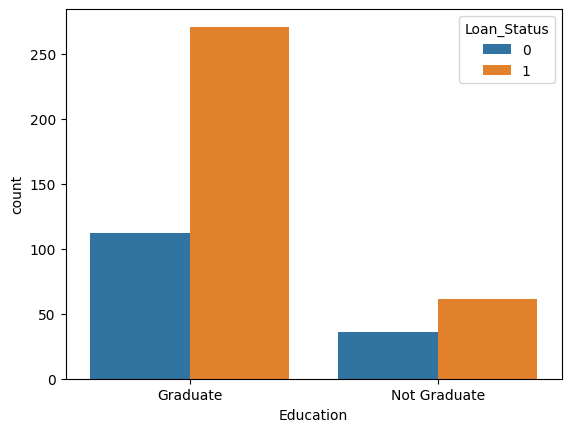

In [ ]:
#education and loan_status
sns.countplot(x = 'Education', hue='Loan_Status', data=df)

<Axes: xlabel='Married', ylabel='count'>

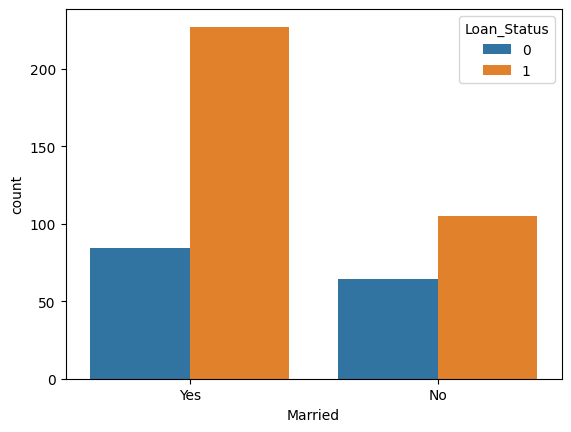

In [ ]:
#Marital Status
sns.countplot(x = 'Married', hue='Loan_Status', data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

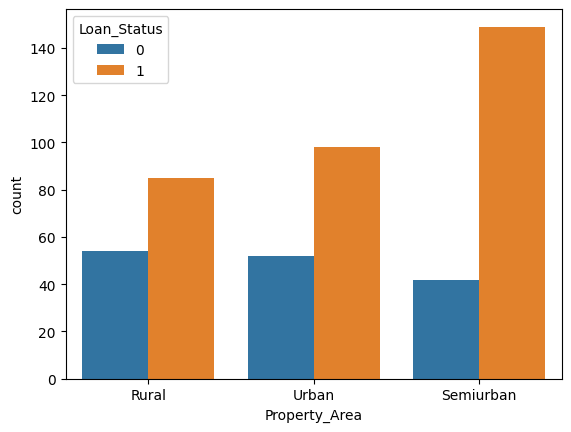

In [ ]:
sns.countplot(x ='Property_Area', hue = 'Loan_Status', data = df)

<Axes: xlabel='Credit_History', ylabel='count'>

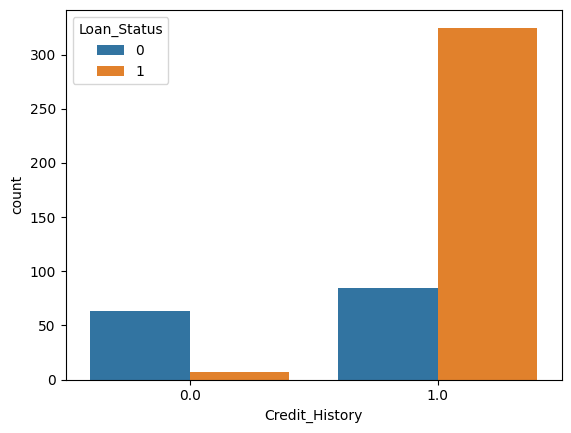

In [ ]:
sns.countplot(x ='Credit_History', hue = 'Loan_Status', data = df)

In [ ]:
#converting categorical column in numerical using pandas replace function
df.replace({'Married':{'Yes':1, 'No':0}, 'Gender':{'Male':1,'Female':0}, 'Self_Employed':{'No':0, 'Yes':1}, 'Property_Area':{'Semiurban':1, 'Urban': 2, 'Rural':0}, 'Education':{'Graduate':1, 'Not Graduate': 0}}, inplace=True)


/tmp/ipython-input-2440579987.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Married':{'Yes':1, 'No':0}, 'Gender':{'Male':1,'Female':0}, 'Self_Employed':{'No':0, 'Yes':1}, 'Property_Area':{'Semiurban':1, 'Urban': 2, 'Rural':0}, 'Education':{'Graduate':1, 'Not Graduate': 0}}, inplace=True)


In [ ]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
154,LP001535,1,0,0,1,0,3254,0.0,50.0,360.0,1.0,2,1
499,LP002602,1,0,0,1,0,6283,4416.0,209.0,360.0,0.0,0,0
414,LP002335,0,1,0,0,0,2149,3237.0,178.0,360.0,0.0,1,0
531,LP002720,1,1,4,1,0,4281,0.0,100.0,360.0,1.0,2,1
443,LP002422,1,0,1,1,0,37719,0.0,152.0,360.0,1.0,1,1
586,LP002916,1,1,0,1,0,2297,1522.0,104.0,360.0,1.0,2,1
166,LP001577,0,1,0,1,0,4583,0.0,112.0,360.0,1.0,0,0
230,LP001765,1,1,1,1,0,2491,2054.0,104.0,360.0,1.0,1,1
546,LP002768,1,0,0,0,0,3358,0.0,80.0,36.0,1.0,1,0
397,LP002281,1,1,0,1,0,3033,1459.0,95.0,360.0,1.0,2,1


In [ ]:
df['Education'].value_counts()

,count
Education,
1,383
0,97


In [ ]:
#separating the data
x = df.drop(columns=['Loan_ID','Loan_Status'], axis=1)
y = df['Loan_Status']

In [ ]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


#### train test split


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, stratify=y, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(480, 11) (432, 11) (48, 11)


In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(480,) (432,) (48,)


In [ ]:
print(x_train)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
122       0        0          0          1              0             2137   
498       1        1          1          1              1             2895   
144       1        1          2          1              0            11757   
217       1        1          0          1              0             3727   
362       1        1          0          1              0             4750   
..      ...      ...        ...        ...            ...              ...   
72        1        0          0          1              0             3500   
390       1        0          4          1              0             9167   
76        1        0          0          1              0             3750   
286       0        0          0          1              1             2600   
376       1        1          4          1              0             8750   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
print(y_train)

122    1
498    1
144    1
217    1
362    1
      ..
72     1
390    1
76     0
286    0
376    1
Name: Loan_Status, Length: 432, dtype: int64


In [ ]:
## model selection

In [ ]:
from sklearn import svm

In [ ]:
classifier = svm.SVC(kernel = 'linear')

In [ ]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.8333333333333334